In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import copy
import json
%matplotlib inline

In [62]:
PLOT_TEST = False

TITLE = "imdb_given_mask_init_part_7"
model_index = 4
POPULATION_SIZE = 10

# TITLE = "sber_faq_given_mask_init_part_7"
# model_index = 4
# POPULATION_SIZE = 10

# TITLE = "ag_news_given_mask_init_part_7"
# model_index = 4
# POPULATION_SIZE = 10

# TITLE = "snli_given_mask_init_part_6"
# model_index =  4
# POPULATION_SIZE = 10

# TITLE = "snli_given_mask_init_part_many_inputs_6"
# model_index = 5
# POPULATION_SIZE = 10

# TITLE = "twitter140_one_neuron_init_part_6"
# model_index = 4
# POPULATION_SIZE = 10

data = pd.read_csv("result_tables/result_table_" + TITLE + ".csv", sep='\t')
print("Number of populations: {}".format(int(data.shape[0] / POPULATION_SIZE)))
# data.dropna(axis=1, how="any", inplace=True)

Number of populations: 62


In [63]:
MEASURES = ["classification_log_loss", 
            "classification_accuracy",
            "classification_roc_auc", 
            "classification_f1"]
for measure in MEASURES:
    if (measure == "classification_log_loss_test" 
        or measure == "classification_log_loss_valid"):
        n_best_valid = data[measure + "_valid"].argmin()
        n_best_test = data[measure + "_test"].argmin()
    else:
        n_best_valid = data[measure + "_valid"].argmax()
        n_best_test = data[measure + "_test"].argmax()
    print("{}: best value for VALID \t{} individuum on {} population".format(measure, 
                                                                     n_best_valid % POPULATION_SIZE, 
                                                                     n_best_valid // POPULATION_SIZE))
    print("{}: best value for TEST  \t{} individuum on {} population".format(measure, 
                                                                     n_best_test % POPULATION_SIZE, 
                                                                     n_best_test // POPULATION_SIZE))
    

classification_log_loss: best value for VALID 	0 individuum on 0 population
classification_log_loss: best value for TEST  	0 individuum on 0 population
classification_accuracy: best value for VALID 	3 individuum on 56 population
classification_accuracy: best value for TEST  	3 individuum on 55 population
classification_roc_auc: best value for VALID 	9 individuum on 61 population
classification_roc_auc: best value for TEST  	9 individuum on 61 population
classification_f1: best value for VALID 	3 individuum on 56 population
classification_f1: best value for TEST  	3 individuum on 55 population


/home/dilyara/anaconda3/envs/deep36/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  # This is added back by InteractiveShellApp.init_path()
/home/dilyara/anaconda3/envs/deep36/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


In [64]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, data.shape[0])]
color_ids = np.argsort(data.loc[:, "classification_accuracy_valid"].values)

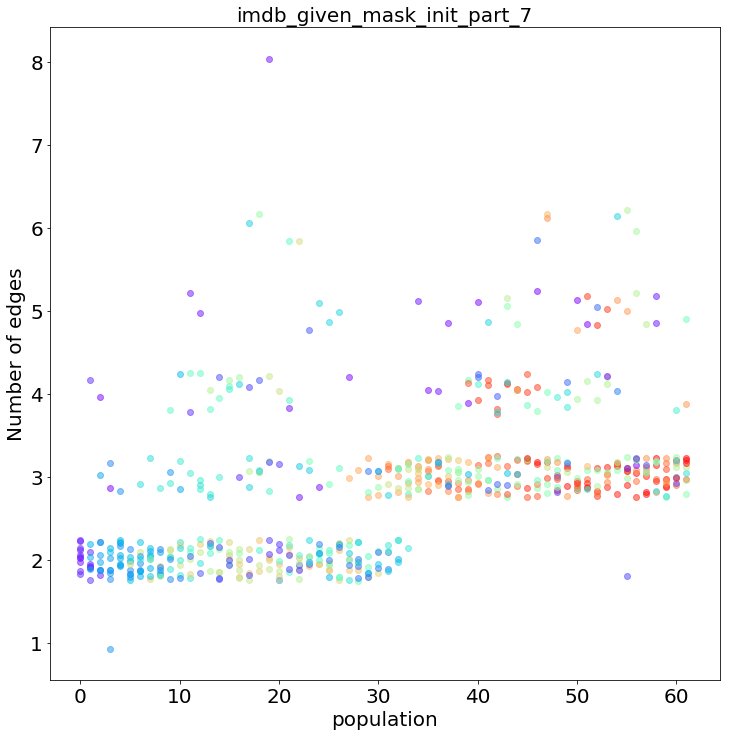

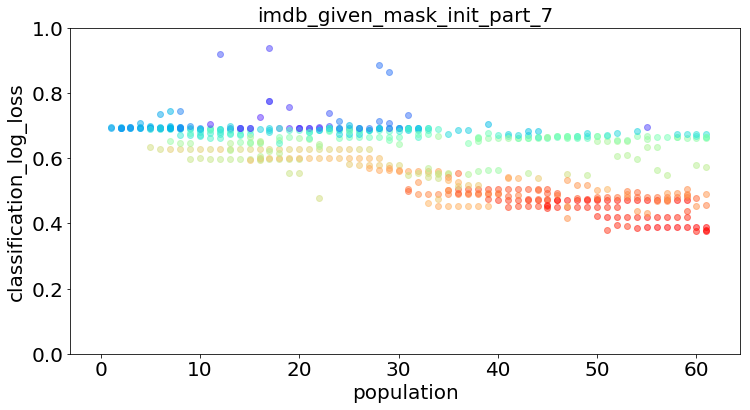

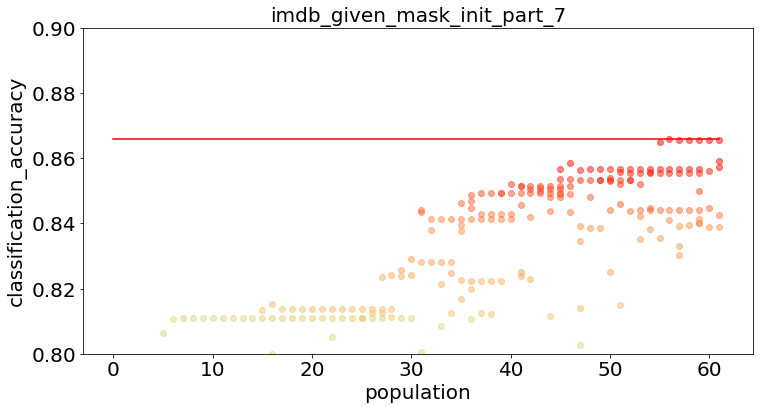

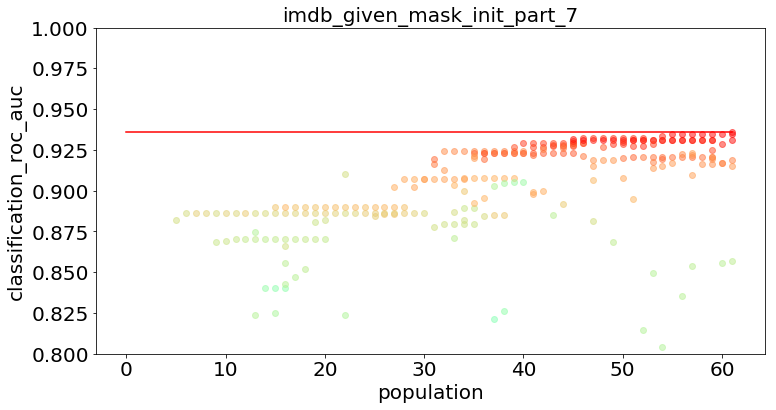

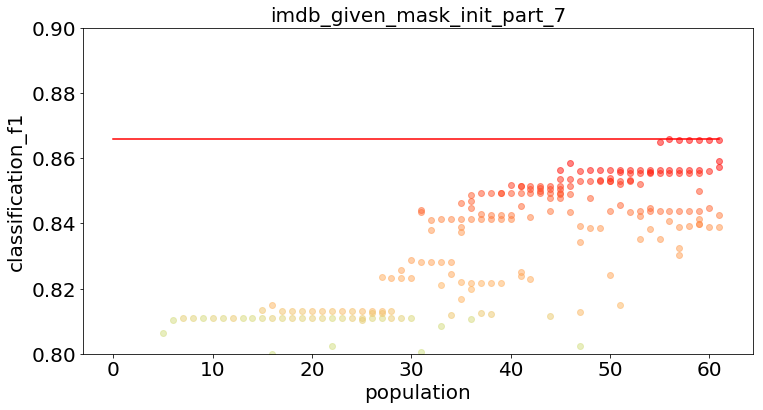

In [66]:
Path("./pics/").joinpath(TITLE).mkdir(exist_ok=True, parents=True)

try:
    y_label = "Number of edges"
    plt.figure(figsize=(12, 12))
    for i in range(data.shape[0]):
        data.loc[i, "params"] = data.loc[i, "params"].replace("False", "false")
        data.loc[i, "params"] = data.loc[i, "params"].replace("True", "true")
        json_acceptable_string = data.loc[i, "params"].replace("'", "\"")
        d = json.loads(json_acceptable_string)
        plt.scatter(i // POPULATION_SIZE, 
                    np.sum(d["chainer"]["pipe"][model_index]["binary_mask"]) 
                    + (np.random.random() - 0.5) / 2, 
                    c=colors[np.where(color_ids == i)[0][0]], alpha=0.5)

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + ".png")
    plt.show()
except:
    pass


# ylims = [(0., 1), (0.85, 1), (0.9, 1.),  (0.85, 1.)] #ag_news
ylims = [(0., 1), (0.8, 0.9), (0.8, 1.),  (0.8, 0.9)] #imdb
# ylims = [(0., 1), (0., 1), (0., 1.),  (0., 1.)]
# ylims = [(0., 1), (0.7, 0.9), (0.9, 1.),  (0.6, 0.85)] #sber faq

for metric, ylim in zip(MEASURES, ylims):
    y_label = metric
    plt.figure(figsize=(12,6))
    for i in range(data.shape[0]):
        plt.scatter(i // POPULATION_SIZE, 
                    data.loc[:, metric + "_valid"].values[i], 
                    c=colors[np.where(color_ids == i)[0][0]], alpha=0.5, marker='o')
    if PLOT_TEST:
        for i in range(data.shape[0]):
            plt.scatter(i // POPULATION_SIZE, 
                        data.loc[:, metric + "_test"].values[i], 
                        c=colors[np.where(color_ids == i)[0][0]], alpha=0.5, marker='+', s=200)

    plt.plot(np.arange(data.shape[0]//POPULATION_SIZE), 
             data.loc[:, metric + "_valid"].max() * np.ones(data.shape[0]//POPULATION_SIZE), 
             c='r')

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.ylim(ylim[0], ylim[1])
    # plt.ylim(0.85, 0.95)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + ".png")
    plt.show()

In [67]:
params_dictionaries = []

for i in range(data.shape[0]):
    data.loc[i, "params"] = data.loc[i, "params"].replace("False", "false")
    data.loc[i, "params"] = data.loc[i, "params"].replace("True", "true")
    json_acceptable_string = data.loc[i, "params"].replace("'", "\"")
    d = json.loads(json_acceptable_string)
    params_dictionaries.append(d)

# Model ids

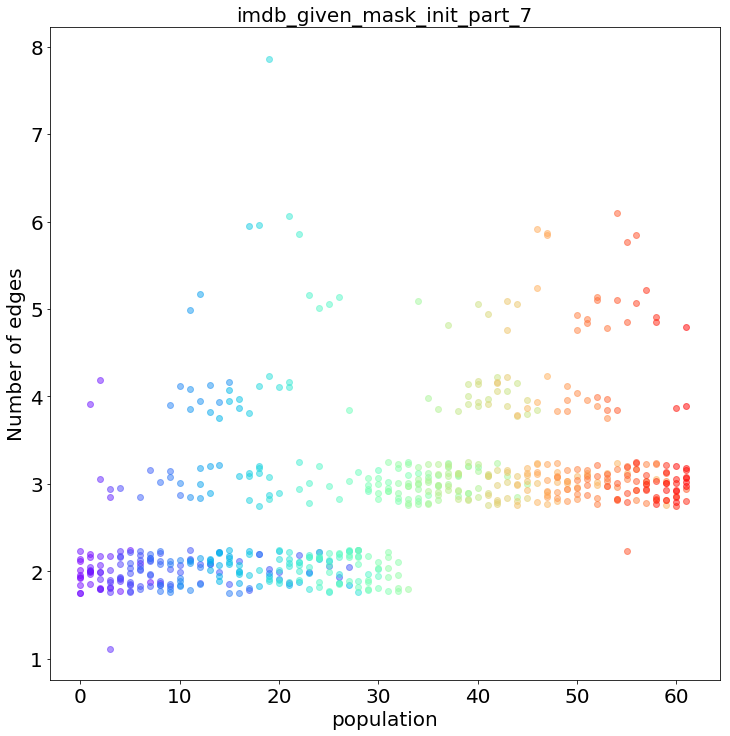

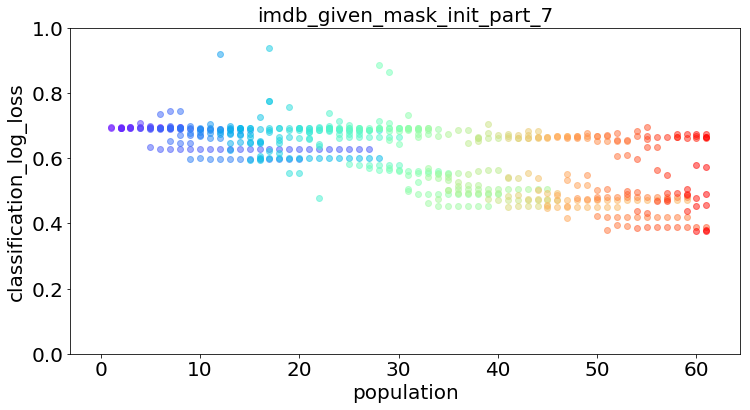

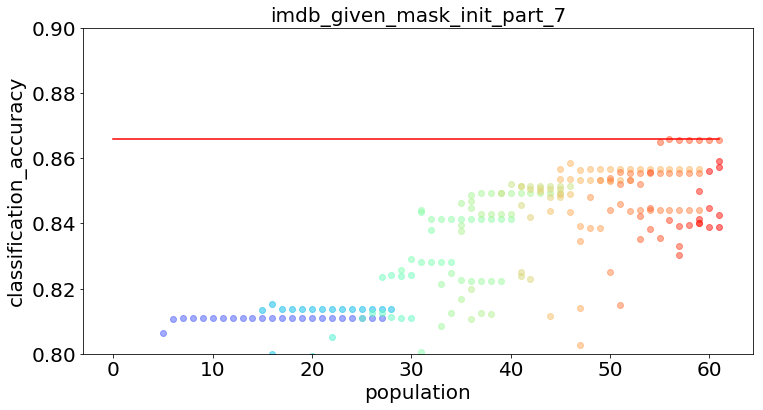

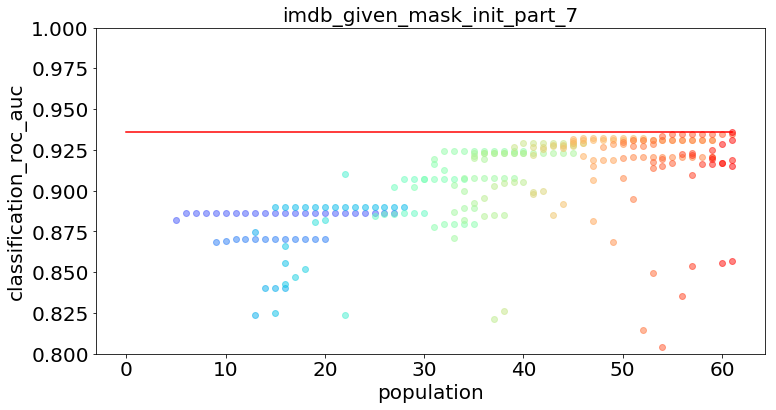

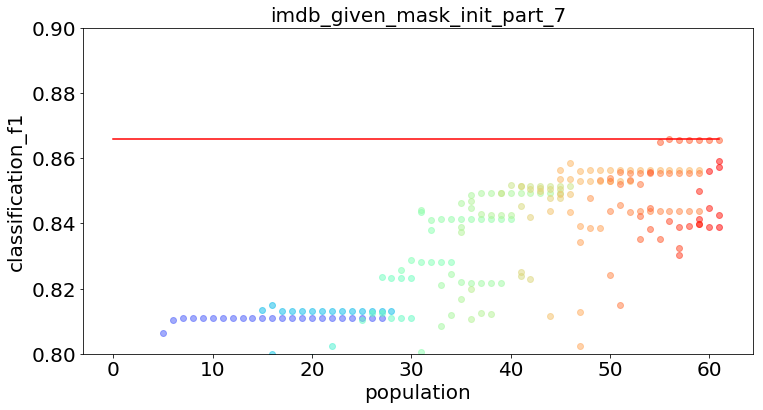

In [68]:
models_ids = []
for pdict in params_dictionaries:
    models_ids.append(pdict["train"]["evolution_model_id"])
    
models_ids = np.array(models_ids)

cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(models_ids)))]

# plt.figure(figsize=(12,6))
# for i in range(data.shape[0]):
#     try:
#         plt.scatter(i // 10, 
#                 data.loc[:, "classification_accuracy_valid"].values[i], 
#                 c=colors[models_ids[i]], alpha=0.5, marker='o')
#     except IndexError:
#         print(models_ids[i])
#         print(colors[models_ids[i]-min_mid])


try:
    y_label = "Number of edges"
    plt.figure(figsize=(12, 12))
    for i in range(data.shape[0]):
        data.loc[i, "params"] = data.loc[i, "params"].replace("False", "false")
        data.loc[i, "params"] = data.loc[i, "params"].replace("True", "true")
        json_acceptable_string = data.loc[i, "params"].replace("'", "\"")
        d = json.loads(json_acceptable_string)
        plt.scatter(i // POPULATION_SIZE, 
                    np.sum(d["chainer"]["pipe"][model_index]["binary_mask"]) 
                    + (np.random.random() - 0.5) / 2, 
                    c=colors[models_ids[i]], alpha=0.5)

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + "_colored_ids.png")
    plt.show()
except:
    pass

# ylims = [(0., 1), (0.85, 1), (0.9, 1.),  (0.85, 1.)] #ag_news
# ylims = [(0., 1), (0., 1), (0., 1.),  (0., 1.)]
# ylims = [(0., 1), (0.7, 0.9), (0.9, 1.),  (0.6, 0.85)] #sber faq
ylims = [(0., 1), (0.8, 0.9), (0.8, 1.),  (0.8, 0.9)] #imdb

for metric, ylim in zip(MEASURES, ylims):
    y_label = metric
    plt.figure(figsize=(12,6))
    for i in range(data.shape[0]):
        plt.scatter(i // POPULATION_SIZE, 
                    data.loc[:, metric + "_valid"].values[i], 
                    c=colors[models_ids[i]], alpha=0.5, marker='o')
    if PLOT_TEST:
        for i in range(data.shape[0]):
            plt.scatter(i // POPULATION_SIZE, 
                        data.loc[:, metric + "_test"].values[i], 
                        c=colors[models_ids[i]], alpha=0.5, marker='+', s=200)

    plt.plot(np.arange(data.shape[0]//POPULATION_SIZE), 
             data.loc[:, metric + "_valid"].max() * np.ones(data.shape[0]//POPULATION_SIZE), 
             c='r')

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.ylim(ylim[0], ylim[1])
    # plt.ylim(0.85, 0.95)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + "_colored_ids.png")
    plt.show()

# Train params

In [60]:
params_dictionaries = []

for i in range(data.shape[0]):
    data.loc[i, "params"] = data.loc[i, "params"].replace("False", "false")
    data.loc[i, "params"] = data.loc[i, "params"].replace("True", "true")
    json_acceptable_string = data.loc[i, "params"].replace("'", "\"")
    d = json.loads(json_acceptable_string)
    params_dictionaries.append(d)

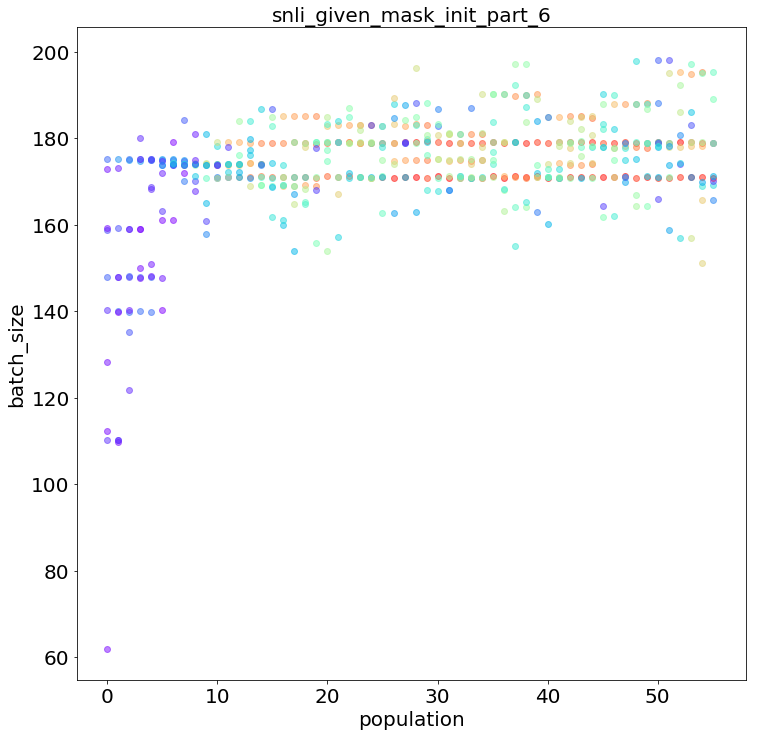

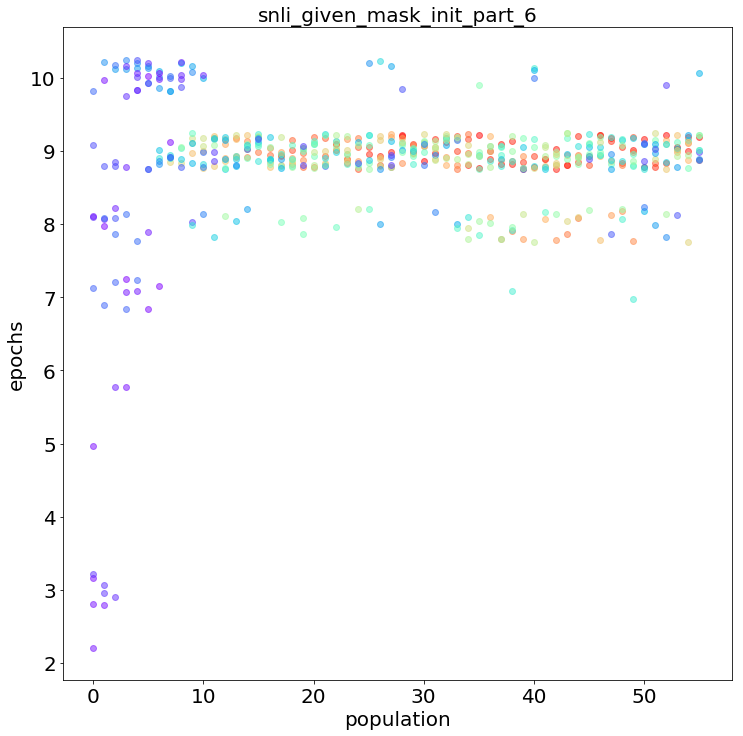

In [61]:
for y_label in ["batch_size", "epochs"]:
# y_label = "batch_size"
    plt.figure(figsize=(12,12))
    for i in range(data.shape[0]):
        plt.scatter(i // 10, 
                    params_dictionaries[i]["train"][y_label] + (np.random.random() - 0.5) / 2, #s=3,
                    c=colors[np.where(color_ids == i)[0][0]], alpha=0.5)

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + ".png")
    plt.show()


# Model params

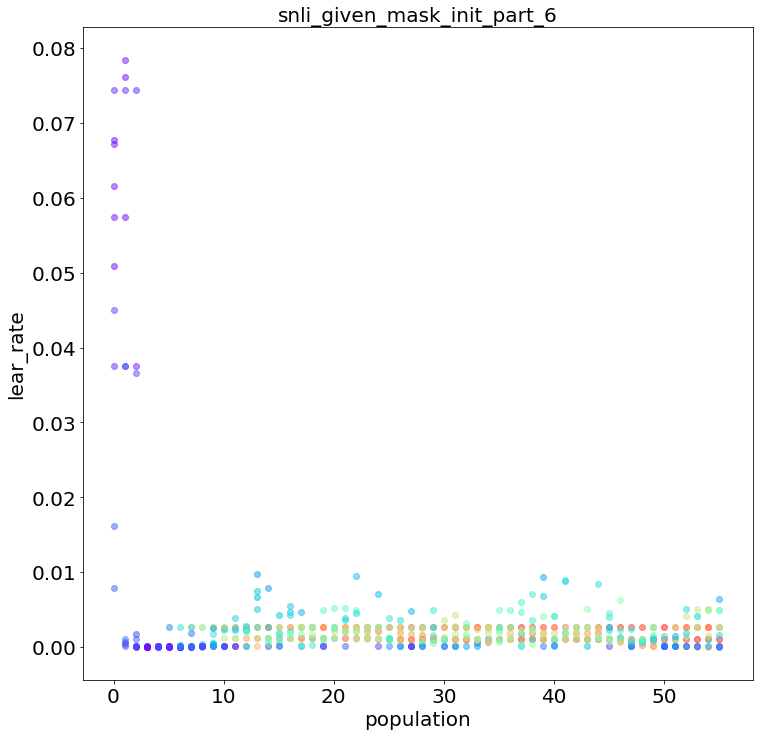

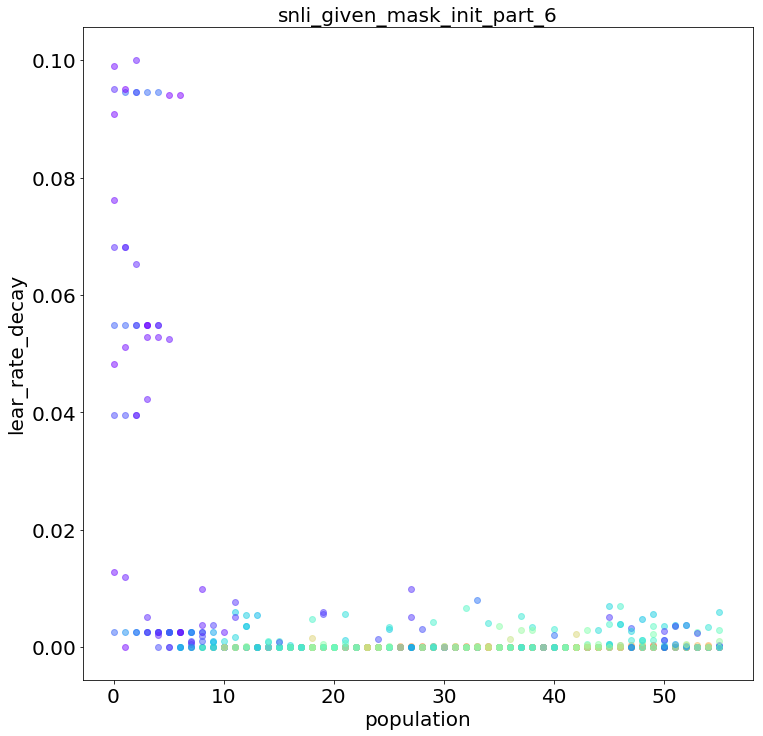

In [62]:
for y_label in ["lear_rate", "lear_rate_decay"]:
    plt.figure(figsize=(12,12))
    for i in range(data.shape[0]):
        plt.scatter(i // 10, 
                    params_dictionaries[i]["chainer"]["pipe"][model_index][y_label],
#                     + (np.random.random() - 0.5) / 2, #s=3,
                    c=colors[np.where(color_ids == i)[0][0]], alpha=0.5)

    plt.ylabel(y_label, fontsize=20)
    plt.xlabel("population", fontsize=20)
    plt.title(TITLE, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + ".png")
    plt.show()


In [63]:
bm = np.array(params_dictionaries[0]["chainer"]["pipe"][model_index]["binary_mask"])
np.sum(bm[0, :])

1.0

# Layer params

/home/dilyara/anaconda3/envs/deep36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


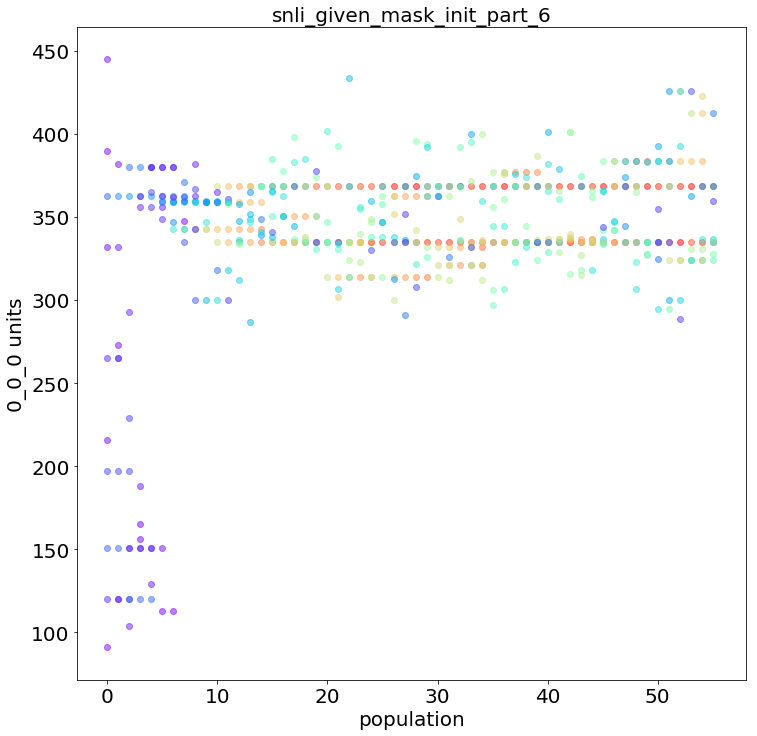

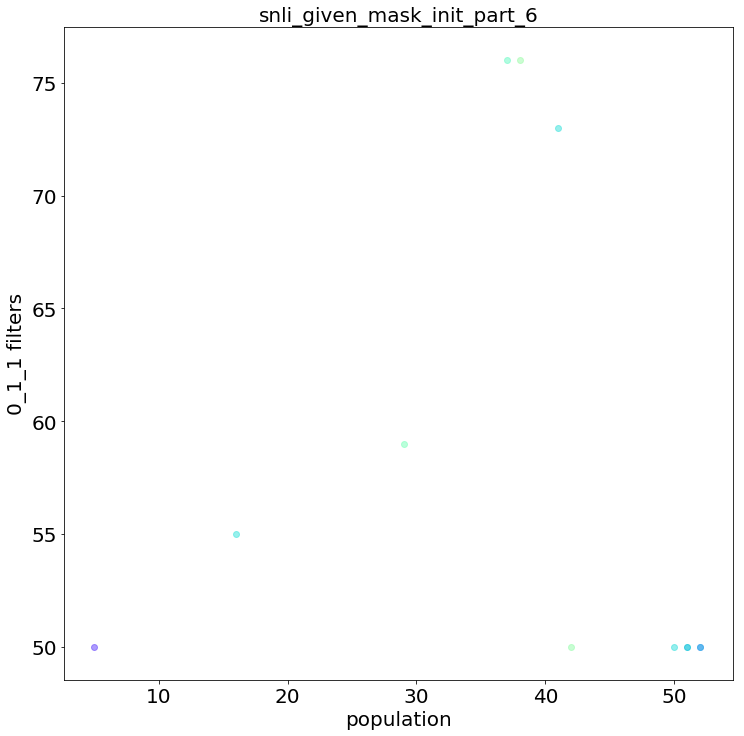

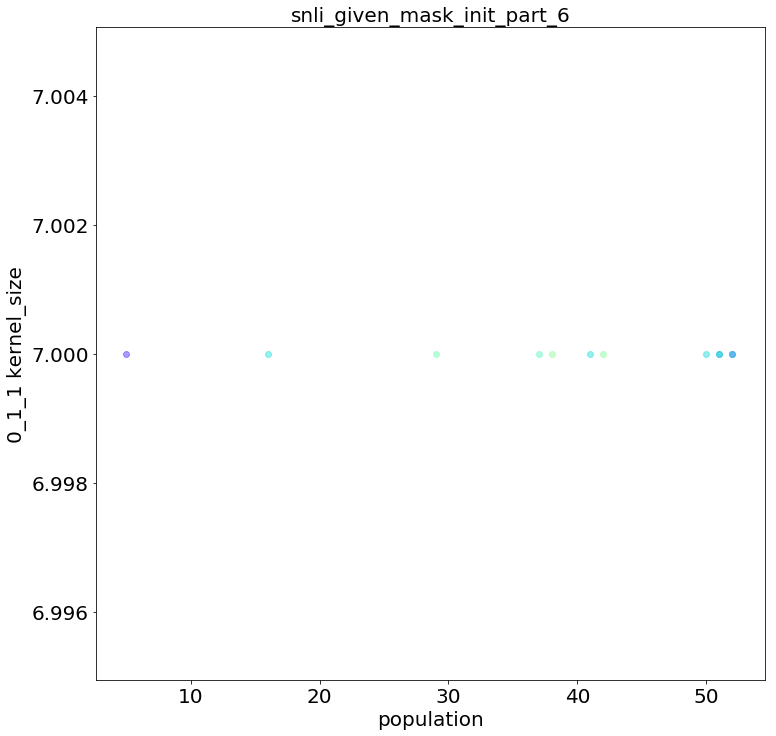

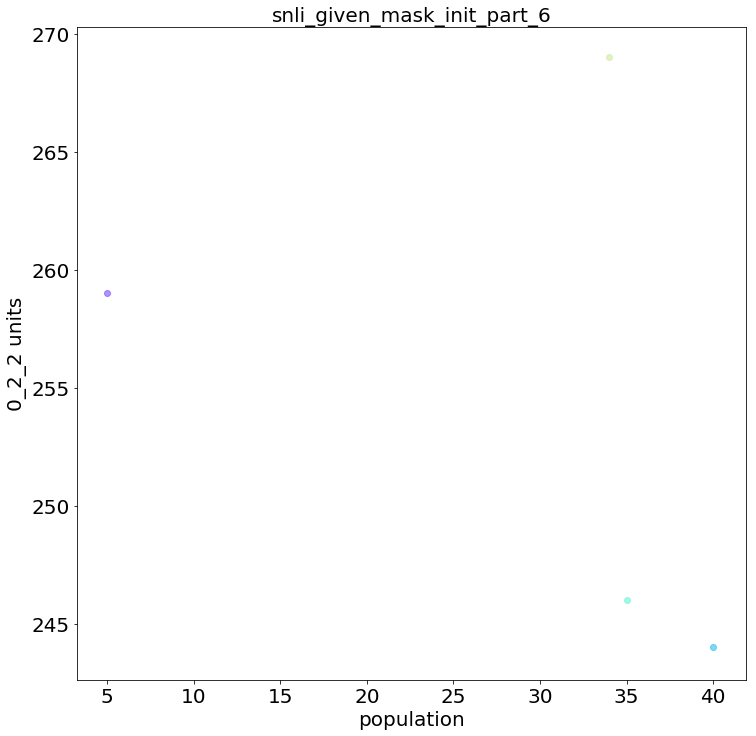

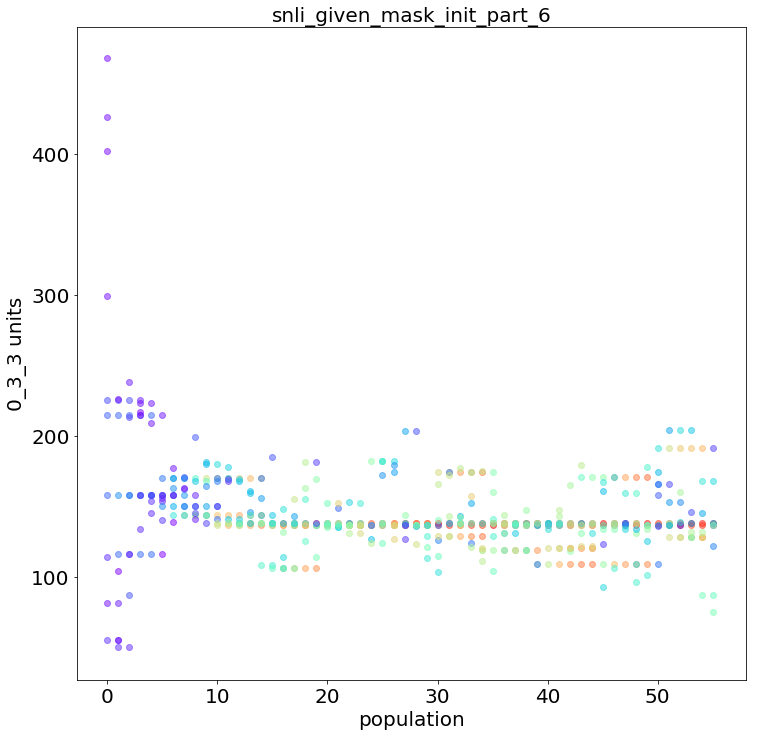

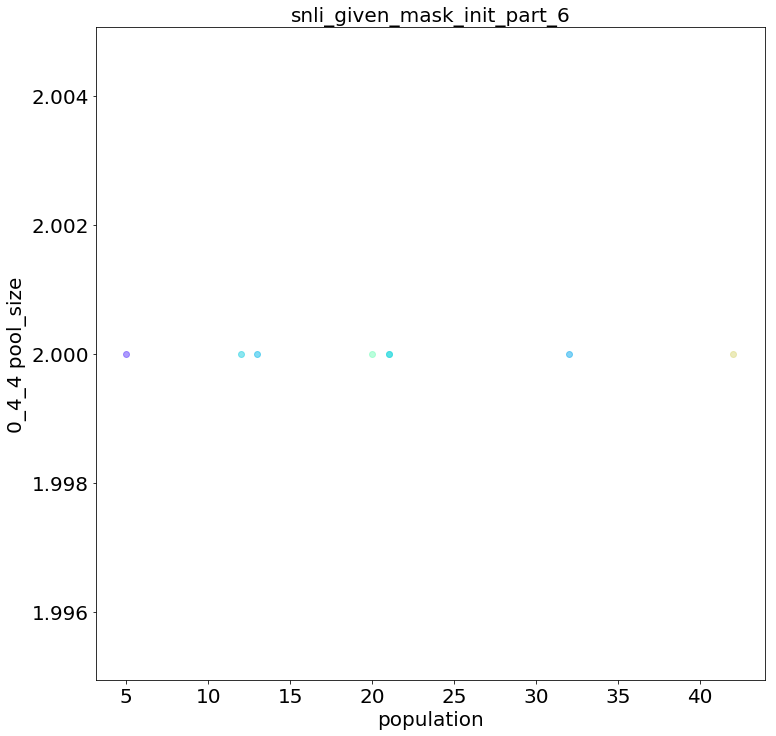

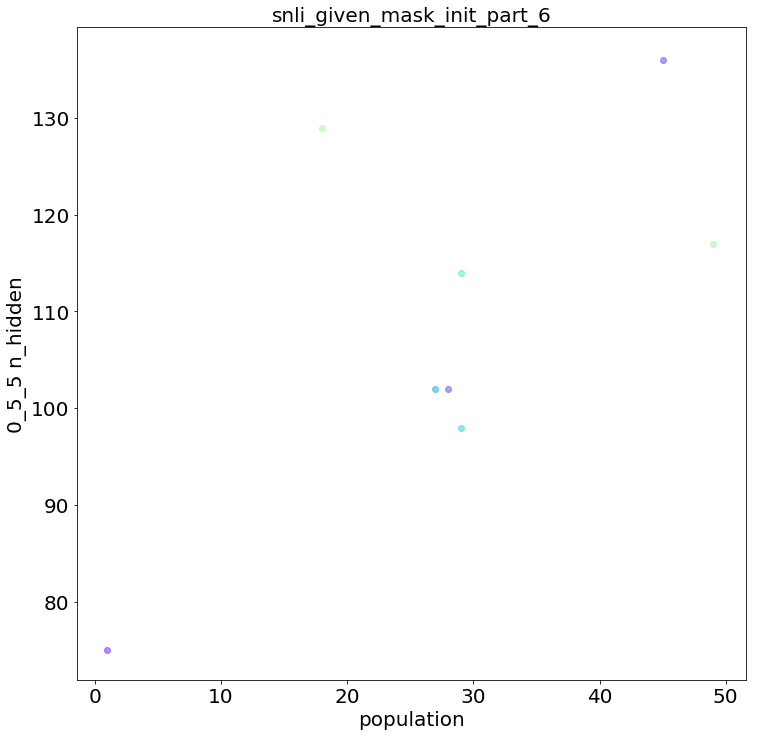

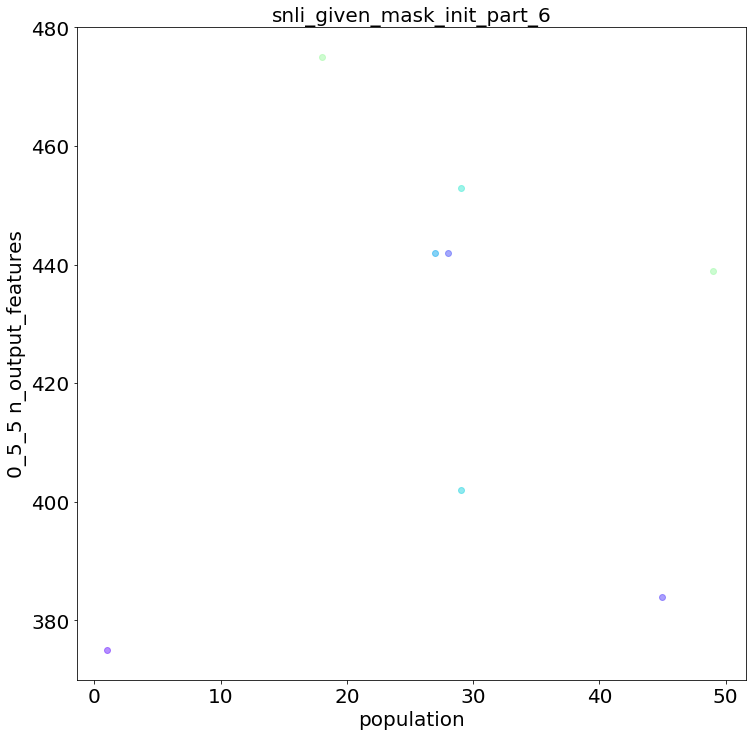

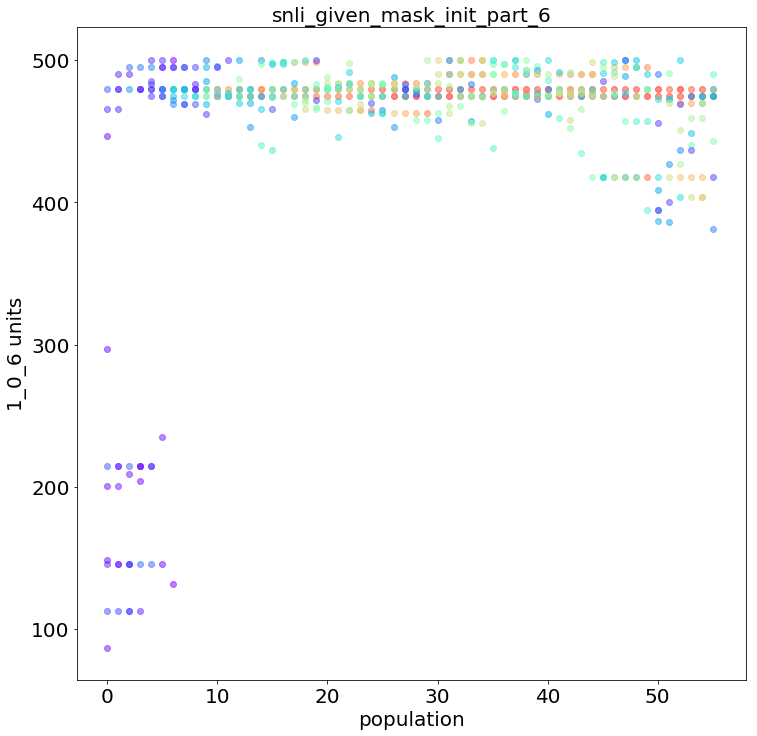

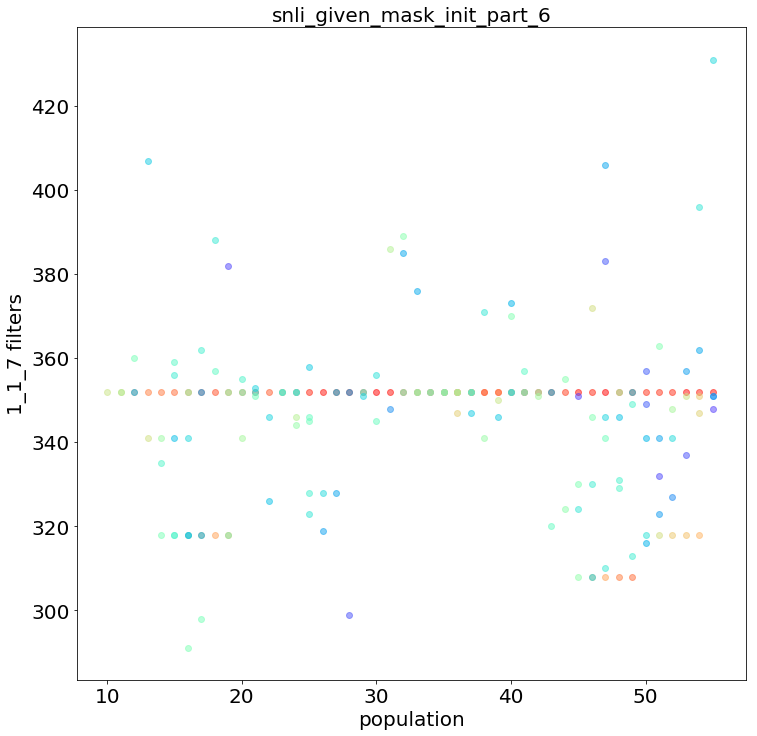

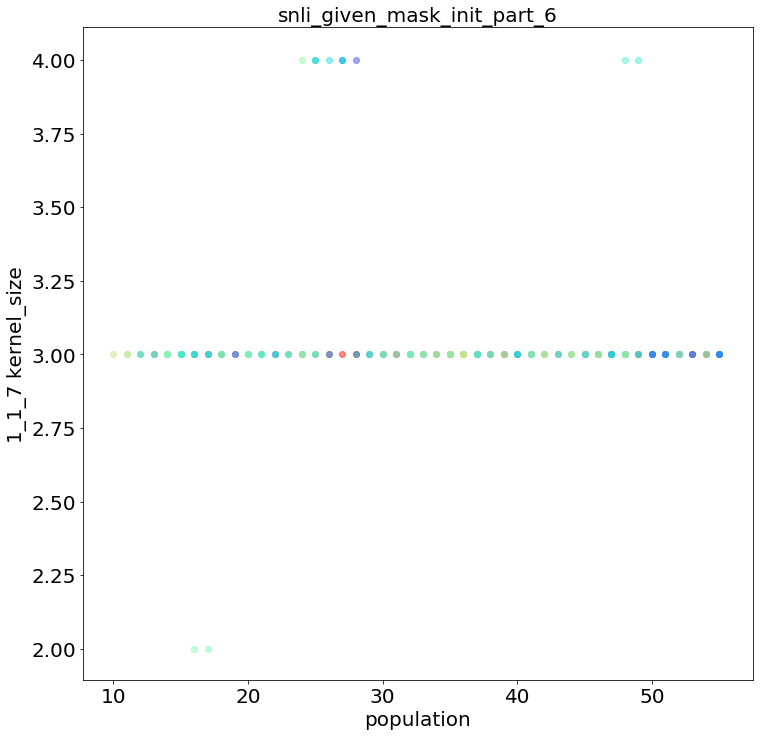

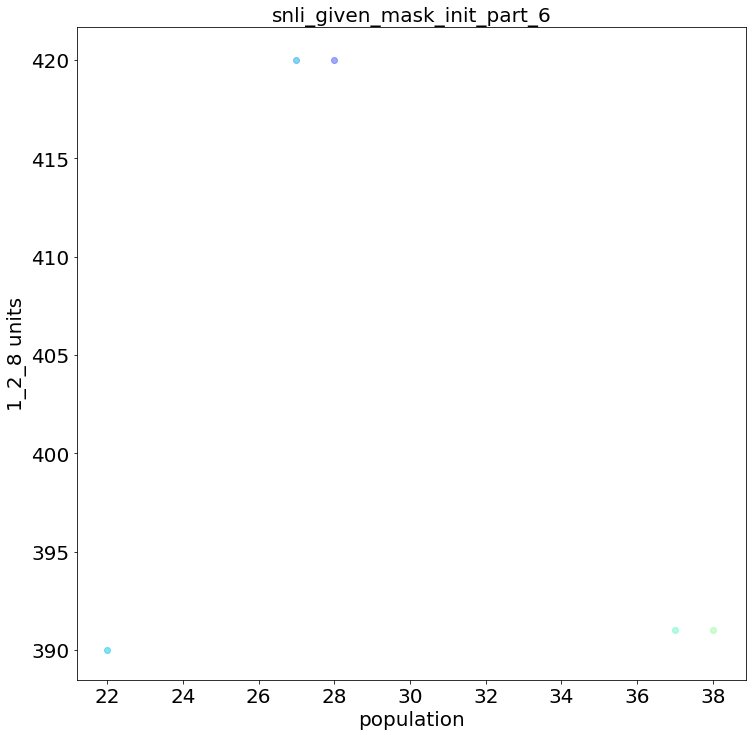

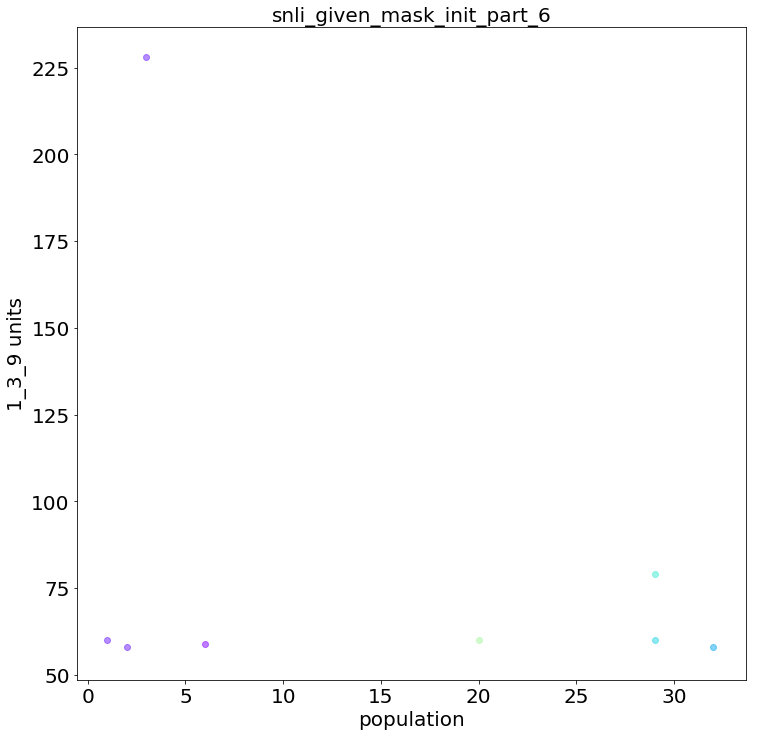

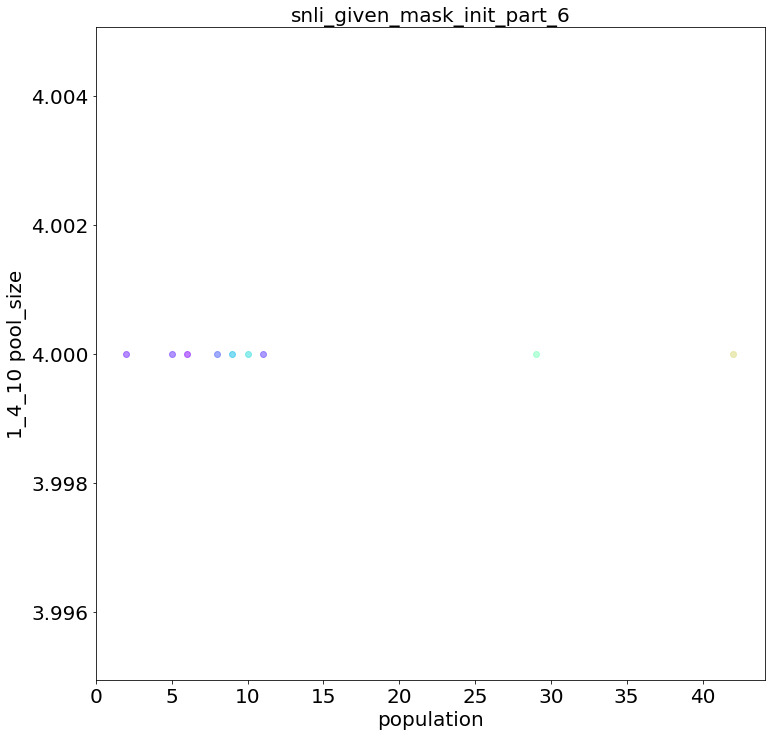

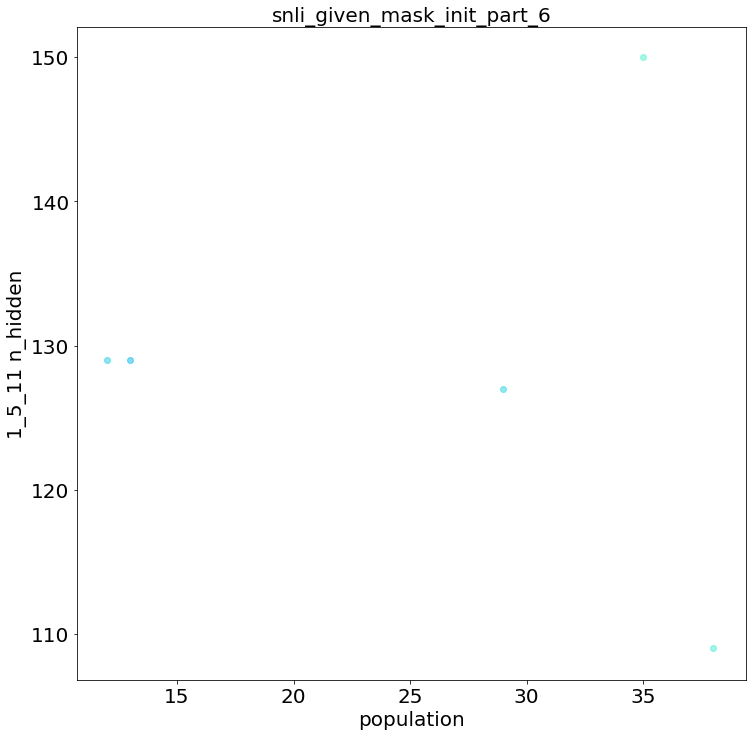

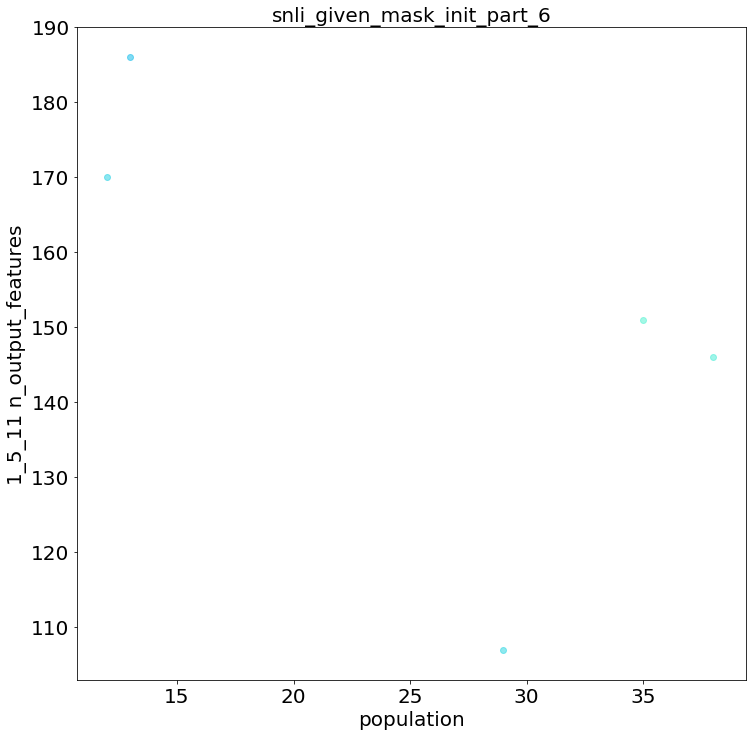

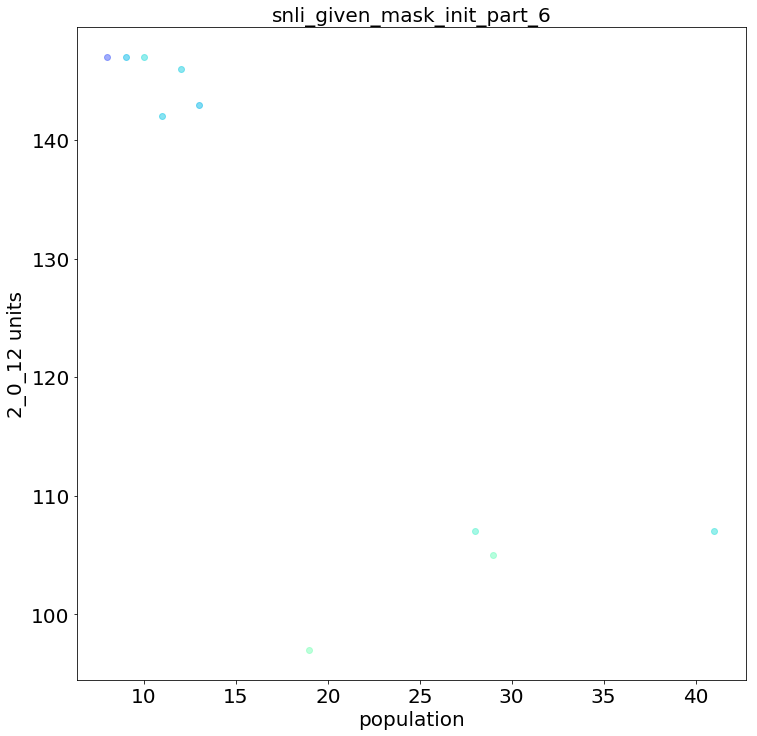

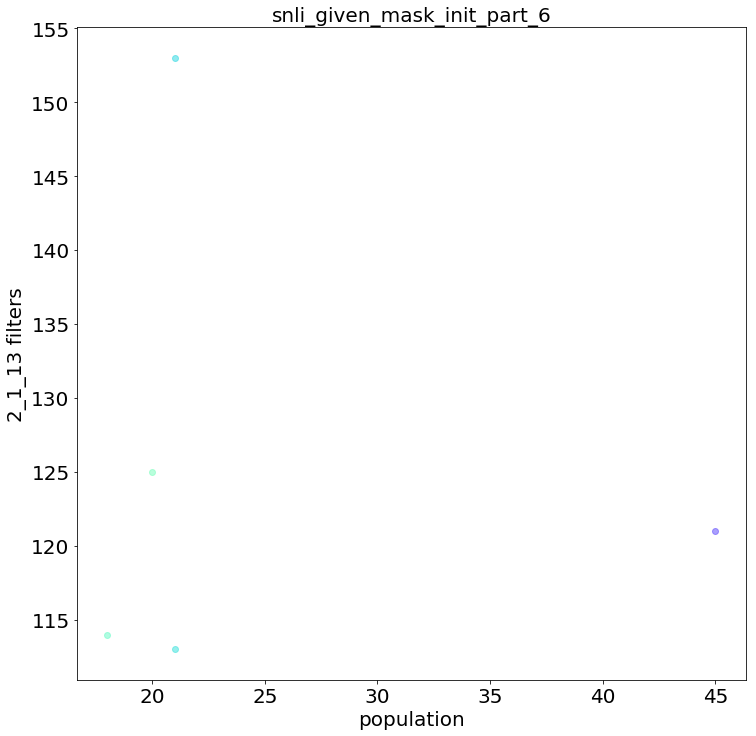

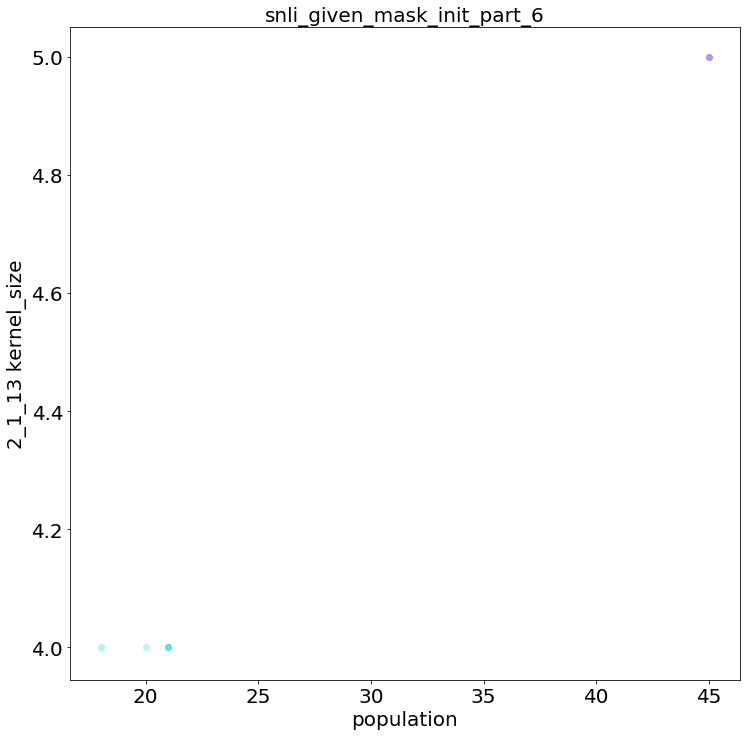

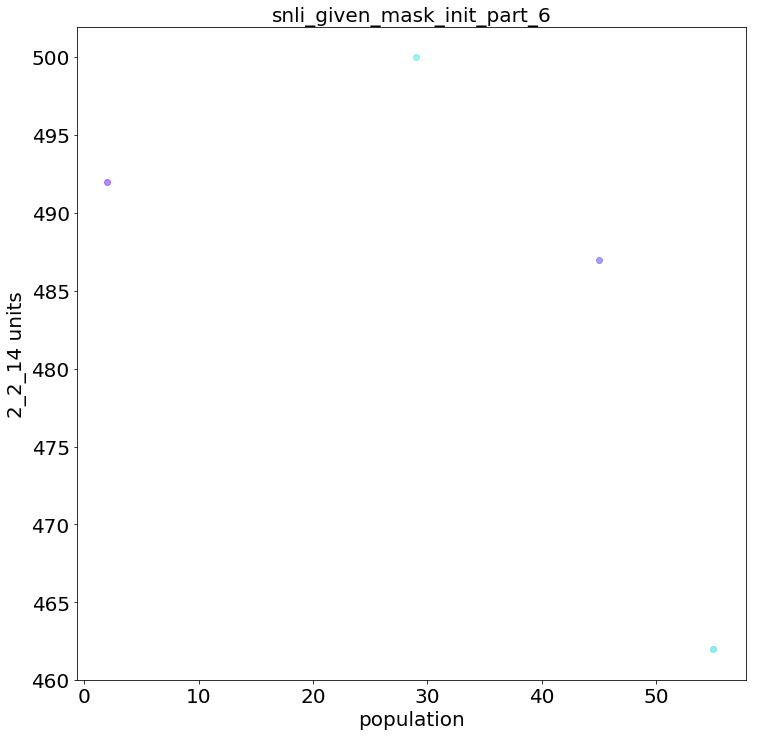

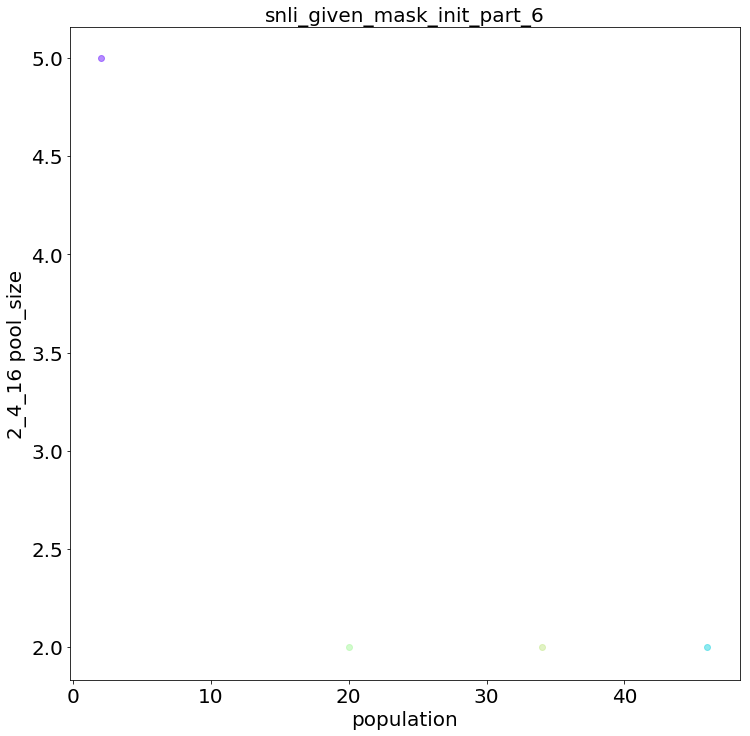

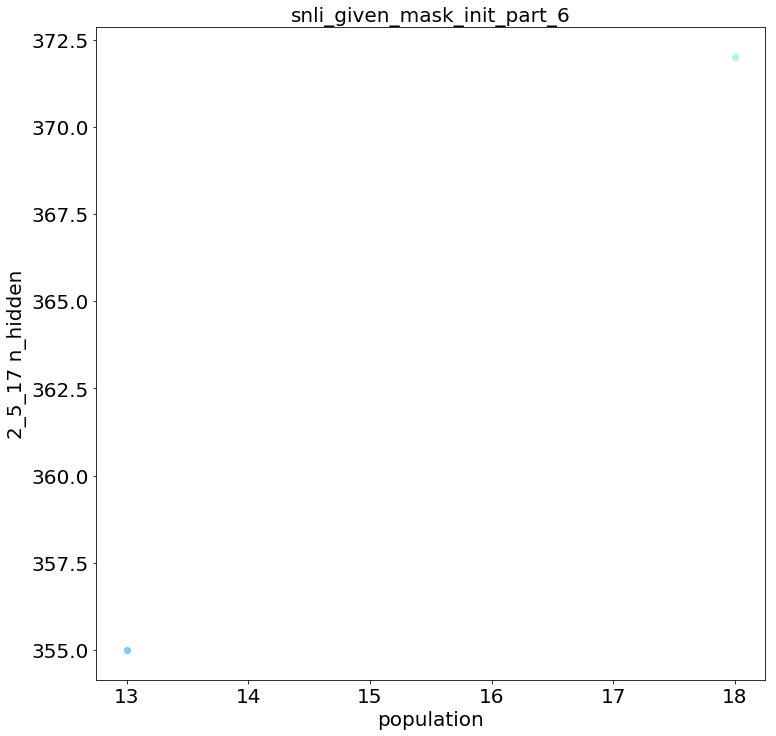

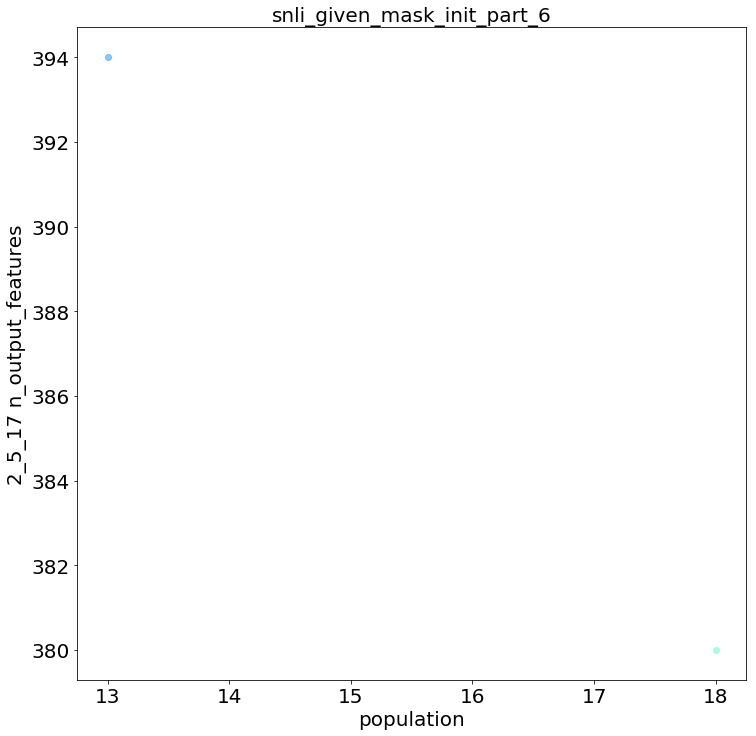

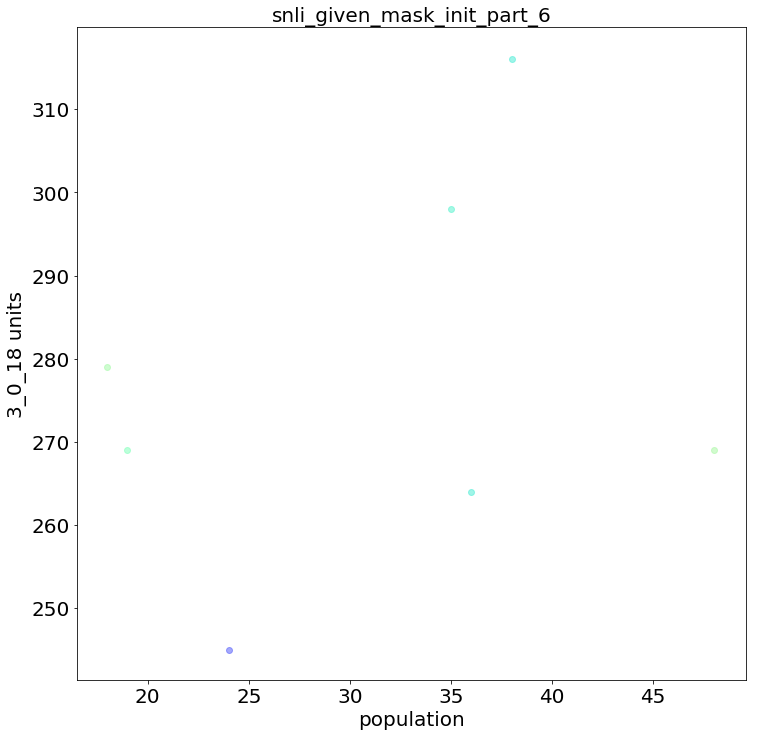

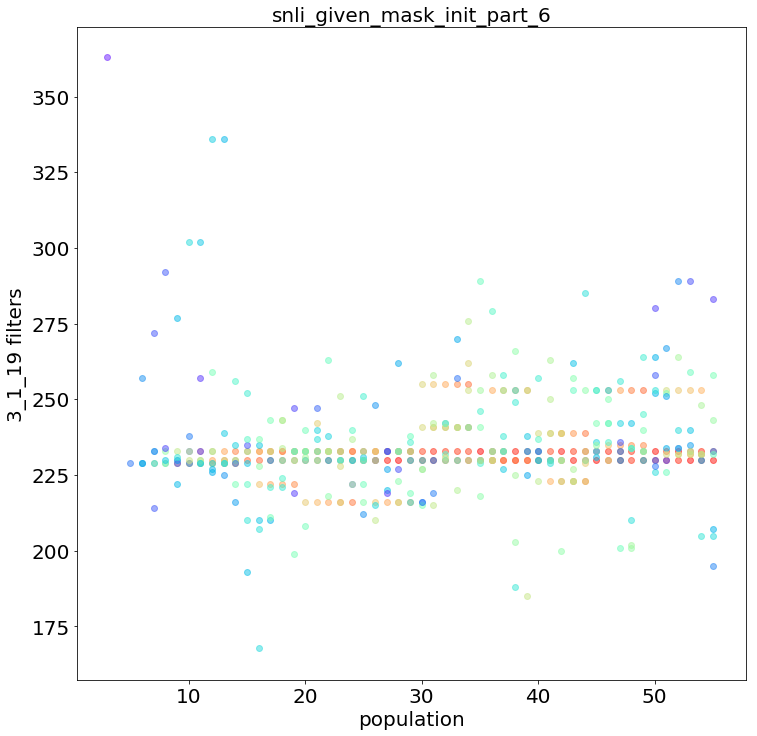

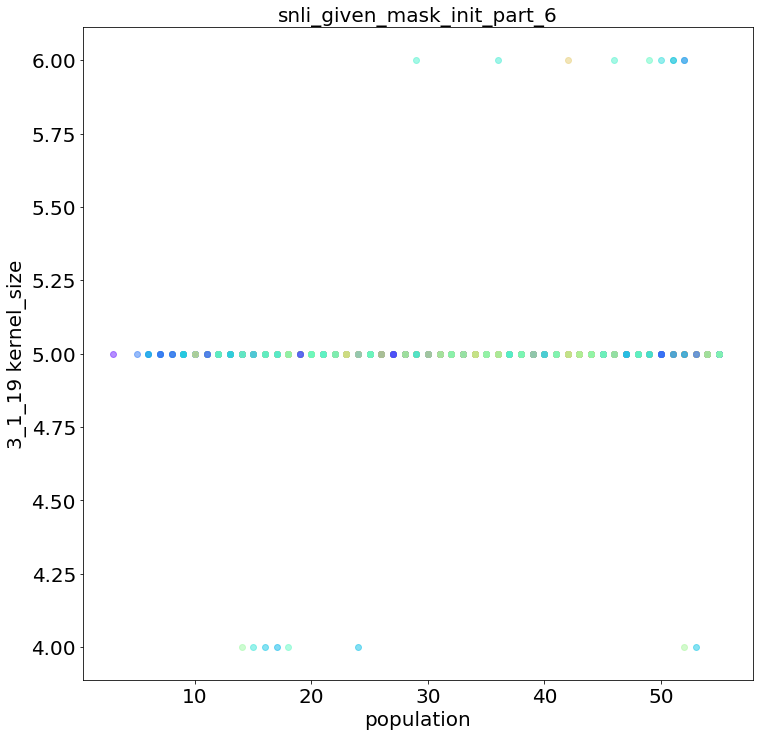

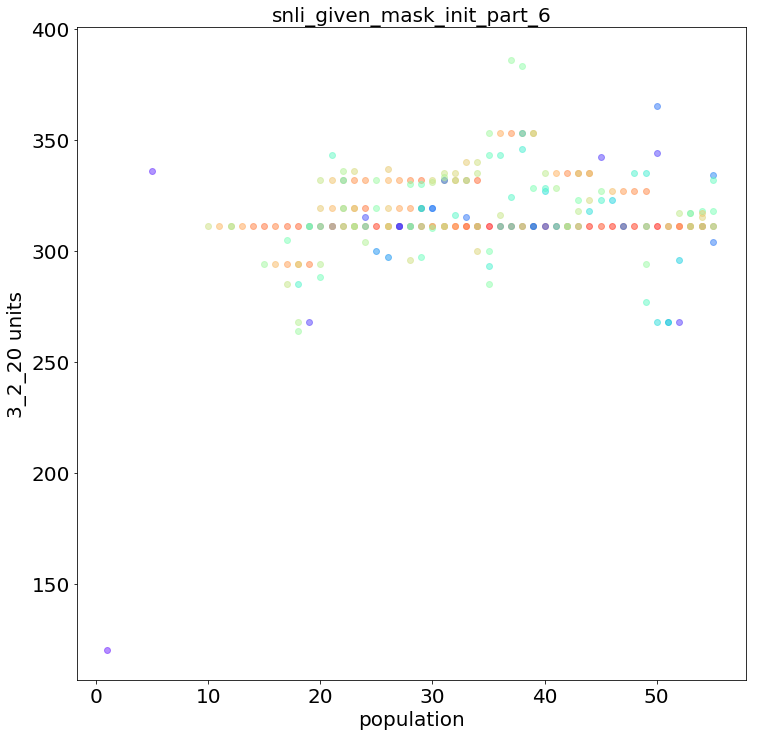

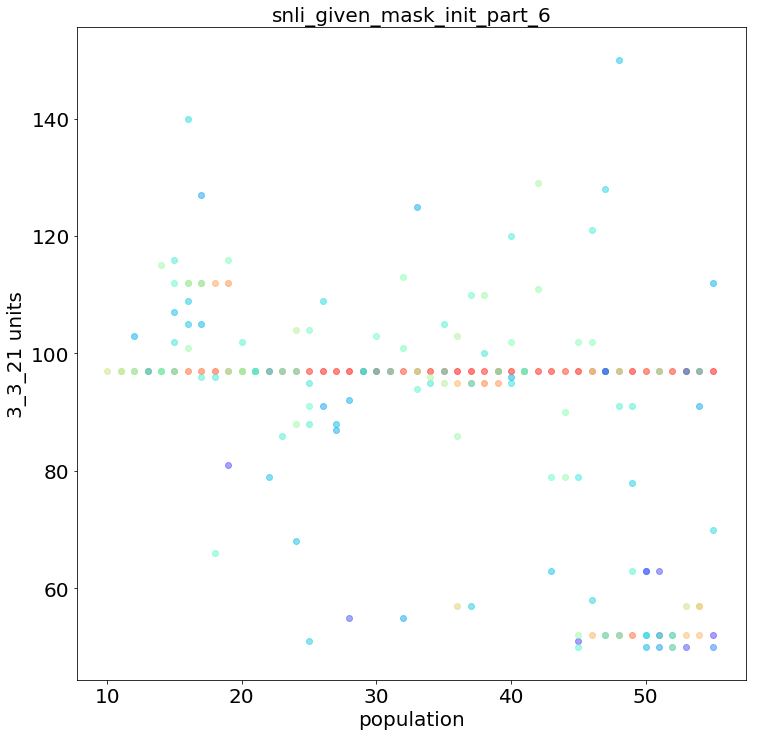

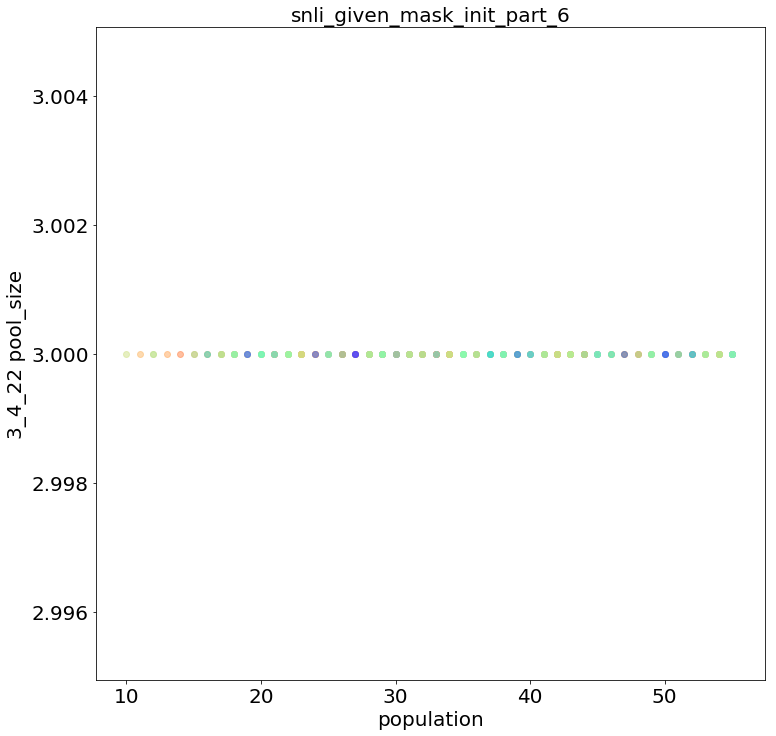

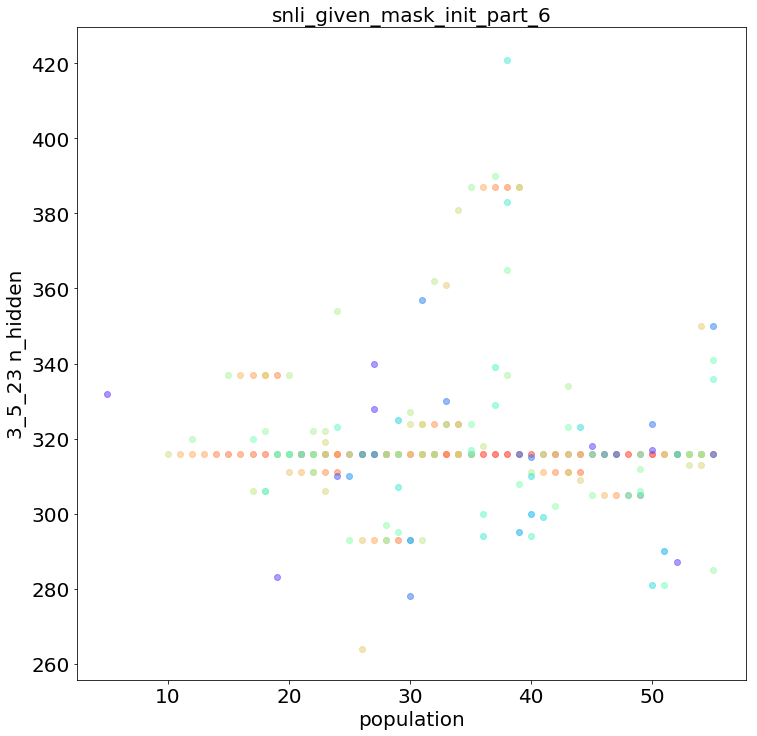

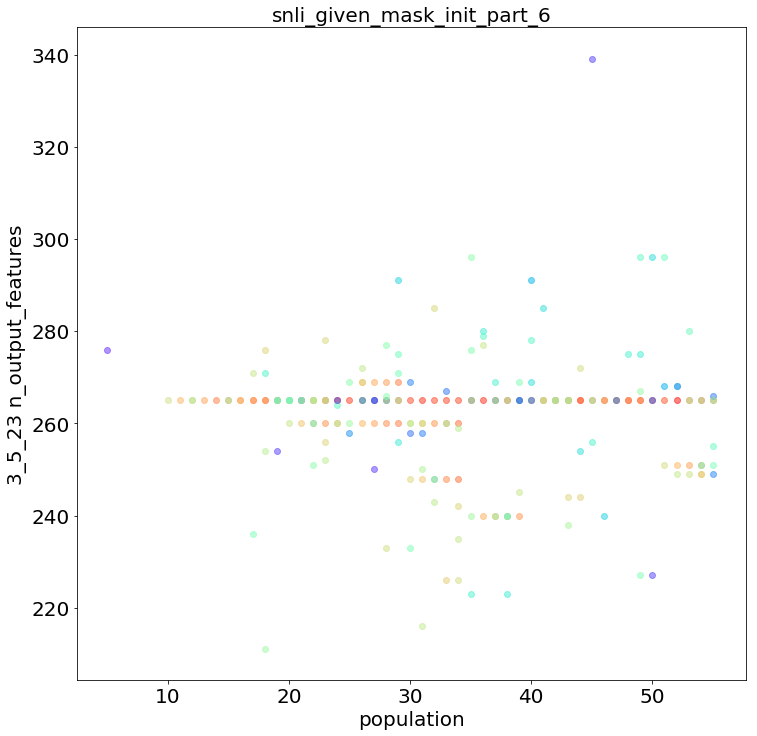

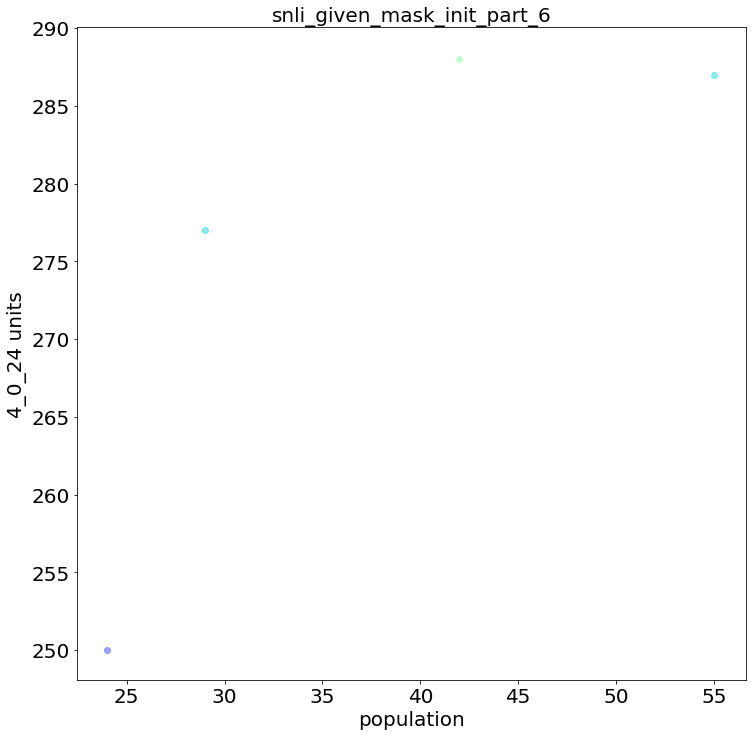

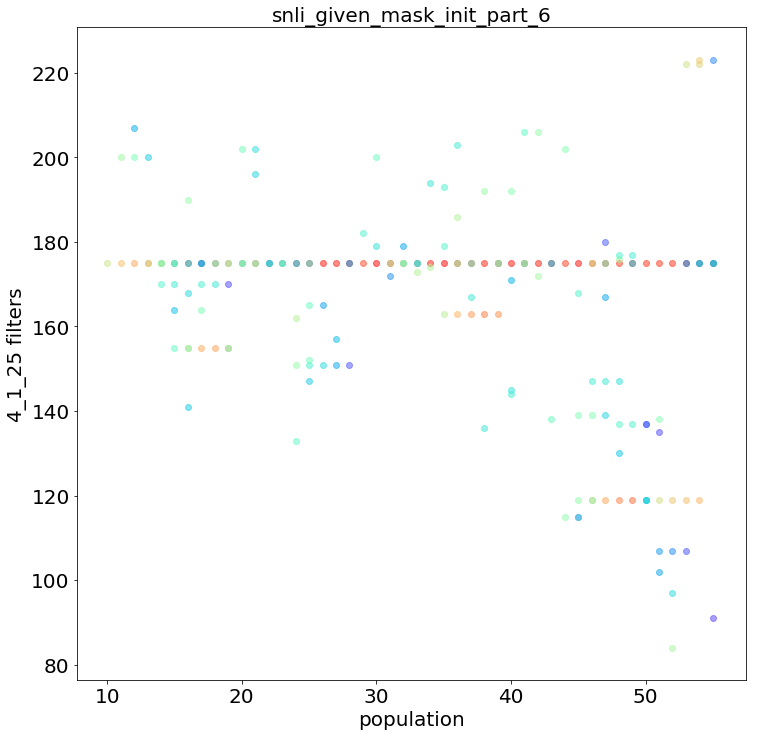

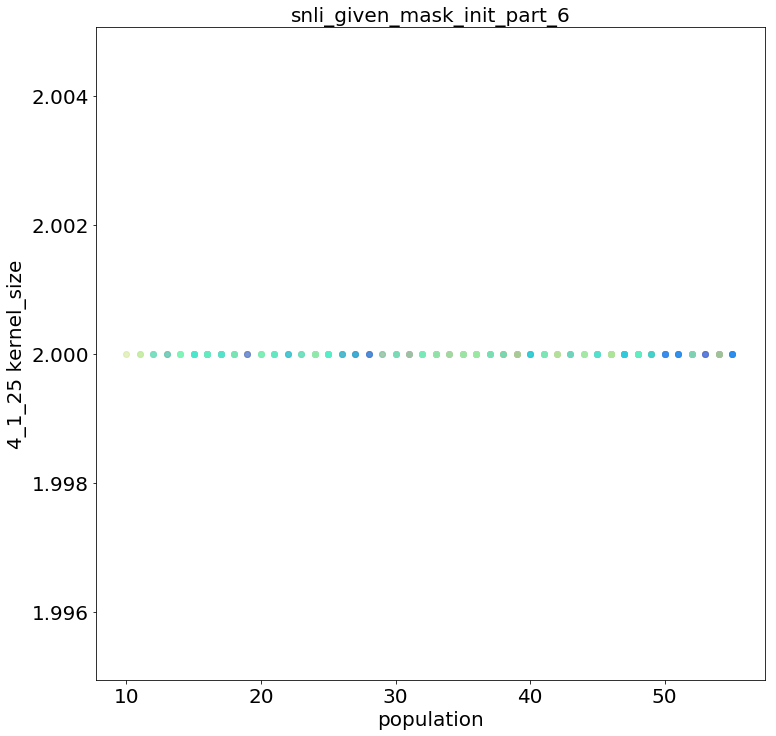

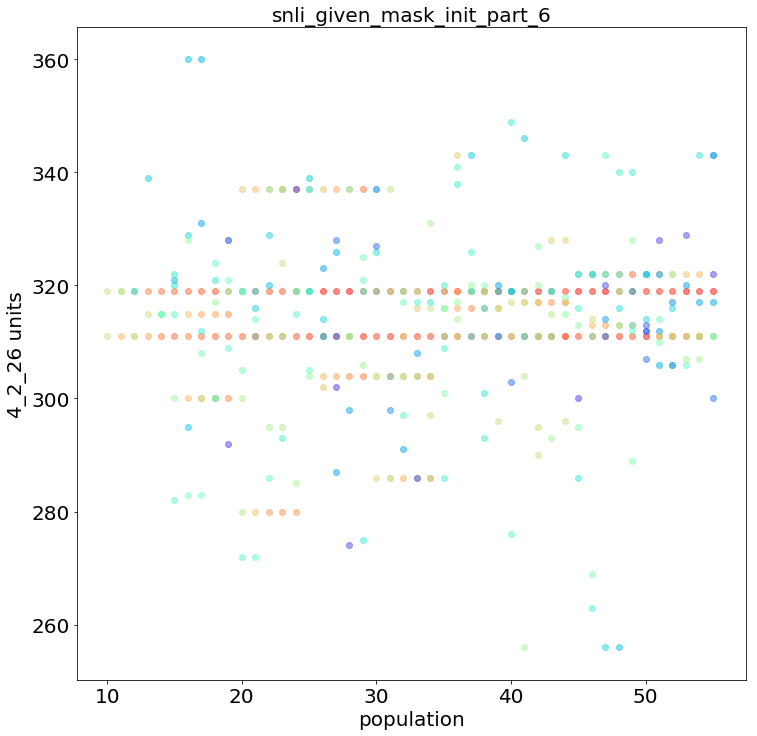

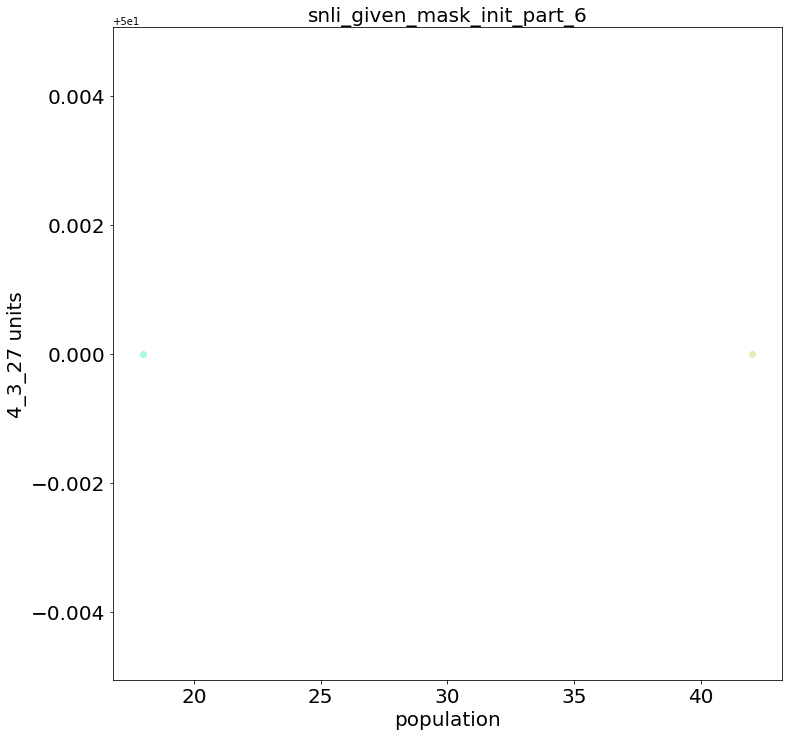

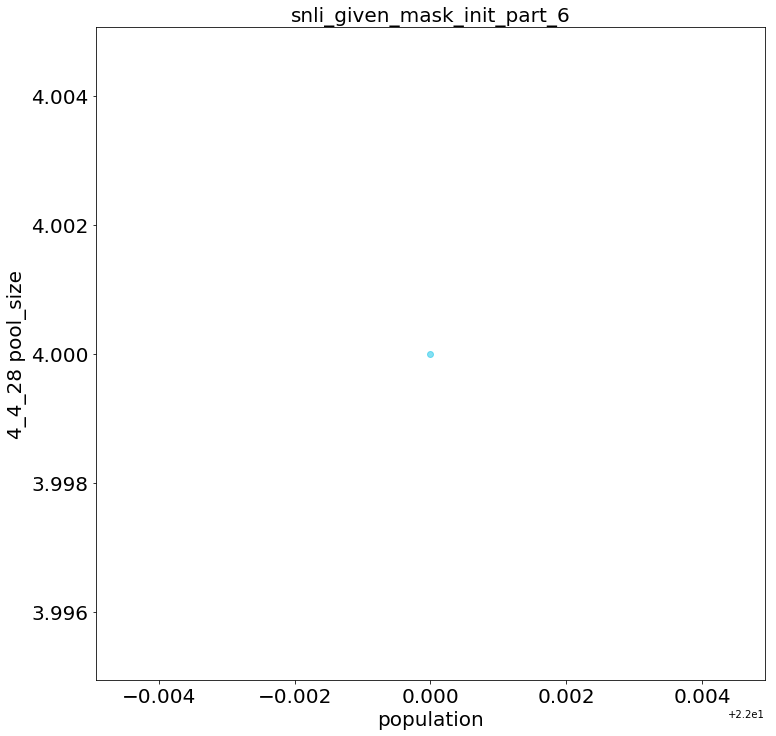

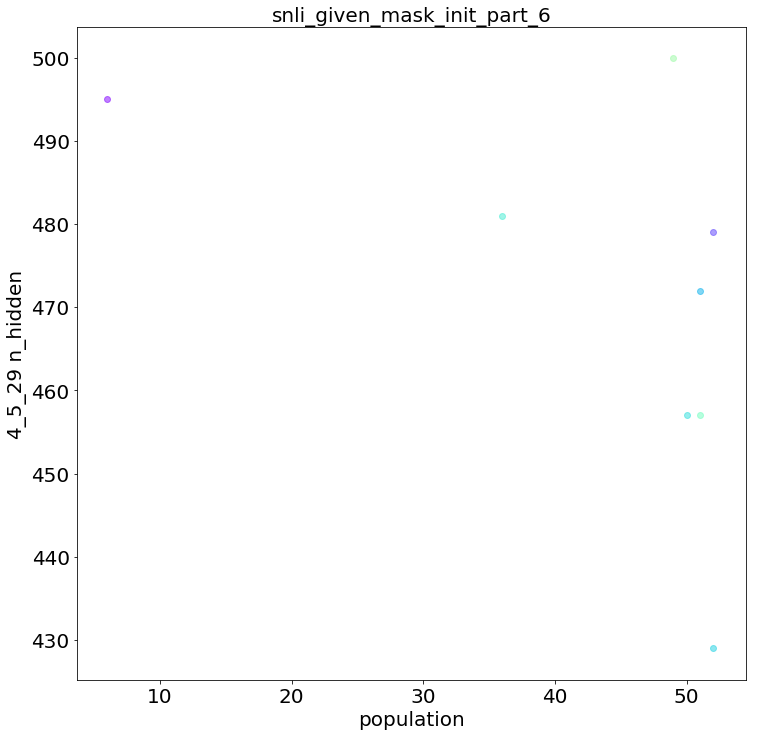

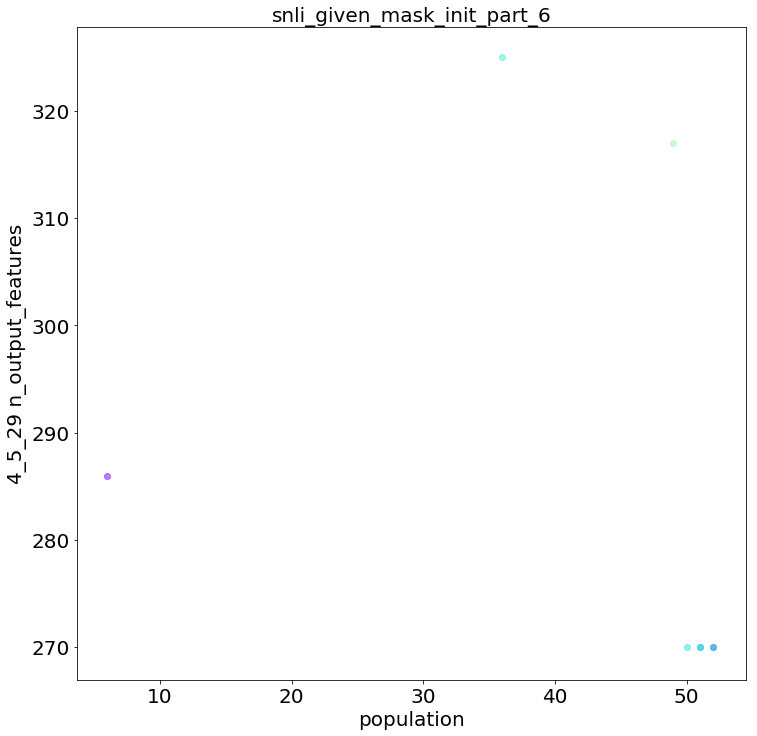

In [64]:
for y_label in list(params_dictionaries[0]["chainer"]["pipe"][model_index]["nodes"].values()):
    layer_params = list(params_dictionaries[0]["chainer"]["pipe"][model_index][y_label].keys())
    layer_params.remove("node_name")
    layer_params.remove("node_type")
    layer_params.remove("node_layer")
    for param in layer_params:
        if (type(params_dictionaries[0]["chainer"]["pipe"][model_index][y_label][param]) is float or
            type(params_dictionaries[0]["chainer"]["pipe"][model_index][y_label][param]) is int):
            plt.figure(figsize=(12,12))
            total_dots = 0
            for i in range(data.shape[0]):
                node_num = int(y_label.split("_")[-1])
                bm = np.array(params_dictionaries[i]["chainer"]["pipe"][model_index]["binary_mask"])
                if np.sum(bm[node_num, :]) > 0 or np.sum(bm[:, node_num]) > 0:
                    total_dots += 1
                    plt.scatter(i // 10, 
                                params_dictionaries[i]["chainer"]["pipe"][model_index][y_label][param],
                                c=colors[np.where(color_ids == i)[0][0]], alpha=0.5)
            if total_dots == 0:
                plt.close()
                continue
            plt.ylabel(y_label + " " + param, fontsize=20)
            plt.xlabel("population", fontsize=20)
            plt.title(TITLE, fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            plt.savefig("./pics/" + TITLE + "/" + TITLE + "_" + y_label + "_" + param + ".png")